In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_1652\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [4]:
df.loc[3028]

Unnamed: 0                         3028.000000
EPIC ID                       246772204.000000
Teff                               3774.059000
logg                                  4.989100
Flare #                               8.000000
Observation time                     80.542088
Average flare duration                0.109820
Longest flare duration                0.143022
Shortest flare duration               0.081726
Average percentage increase          26.477590
Highest percentage increase         141.572642
Lowest percentage increase            8.355105
Name: 3028, dtype: float64

In [5]:
flc = from_mast("246772204", mode="LC", mission="K2")

8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

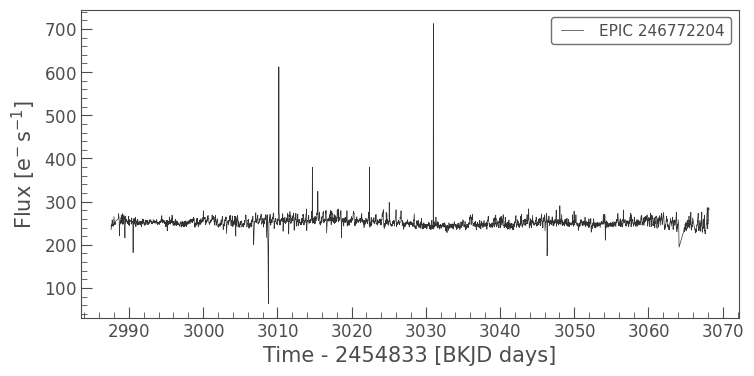

In [6]:
flc.plot()

In [7]:
flc = flc.detrend("savgol")

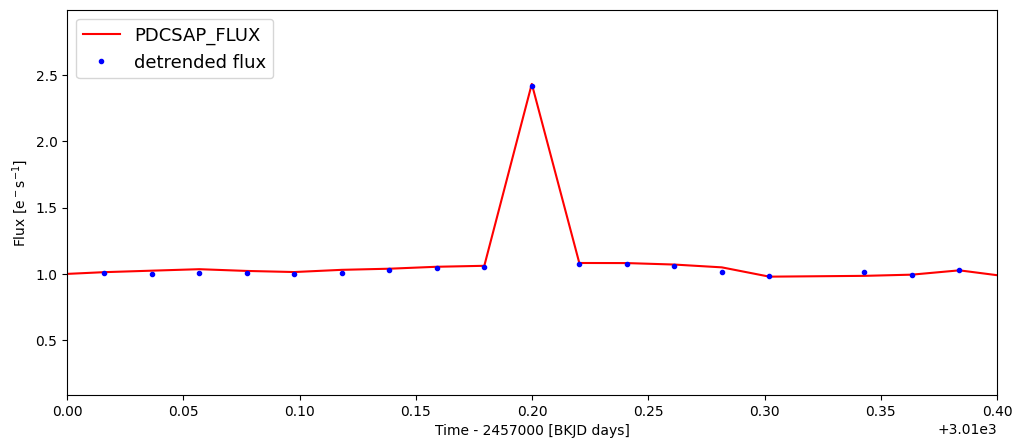

In [11]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(3010, 3010.4)
#plt.ylim(.95,1.05)
plt.legend(loc=2,fontsize=13);

In [10]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,1022,1027,141984,141989,3010.179415,3010.281575,2938.5017875151448,24.437765566075612,1.4157264232635498,0.102159,3620.000000
1,1310,1315,142293,142298,3016.492838,3016.594997,745.2635511261553,44.93594708879164,0.1050642728805542,0.102159,3620.000000
2,1335,1340,142322,142328,3017.085359,3017.207949,727.8032922580796,53.64957467798197,0.08646273612976074,0.122590,3620.000000
3,1380,1385,142370,142376,3018.066082,3018.188672,697.6402183459576,50.79978249060195,0.0861213207244873,0.122590,3620.000000
4,1669,1673,142671,142676,3024.216019,3024.318177,689.234178274362,52.478437953168154,0.09126496315002441,0.102158,3620.000000
5,2568,2572,143630,143634,3043.809926,3043.891652,535.5905790491006,38.26693849535836,0.12817037105560303,0.081726,3620.000000
6,3103,3107,144219,144224,3055.844150,3055.946308,577.3970061516619,48.70444235133092,0.08355104923248291,0.102158,3620.000000
7,3380,3385,144518,144525,3061.953227,3062.096249,1269.9366044942362,71.09225164037623,0.12184607982635498,0.143022,3620.000000


In [9]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 0 candidate(s) in the (0,29) gap.
Found 0 candidate(s) in the (29,875) gap.
Found 5 candidate(s) in the (875,2331) gap.
Found 3 candidate(s) in the (2331,3478) gap.
Found 0 candidate(s) in the (3478,3532) gap.
Found 0 candidate(s) in the (3532,3620) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
